# Regression 2
This chapter will cover different regression algorithms:

- [x] ridge regression;  
- [x] lasso regression;
- [x] other


## Ridge, Lasso, and Linear Regression

First let's review our linear model:

| Term | Math Formulation |
|:-----:|:-----:|
| model | $\mathcal{M} \subset$ {functions from $\mathcal{X}$ to $\mathcal{Y}$ } | 
| loss  | $err(y,\hat{y})$ | 
| objective | $\mathcal{L}$, usually the sum of error | 
| fit | find a regression fuction $f^* \in \mathcal{M}$ that minimize the objective \n | 

If we use our framework to define these algorithms, they are very similiar. The only difference is the loss function.  

| algorithms | loss function |
|:-----:|:-----:|
| Simple Linear Regression | $\sum_{x_i,y_i \in \mathcal{D}} err(y,f(x))$ |
| Ridge Regression | $\sum_{x_i,y_i \in \mathcal{D}} err(y,f(x)) + \alpha \sum_{x_i,y_i \in \mathcal{D}} \beta_i^2 $| 
| Lasso  | $\sum_{x_i,y_i \in \mathcal{D}} err(y,f(x)) + \alpha \sum_{x_i,y_i \in \mathcal{D}} \big|\beta_i\big|$ | 

### implementation
The implementation is similar. Let use the example from the previous chapter to demonstrate.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

This time we will use all the features.

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.33, random_state=42)

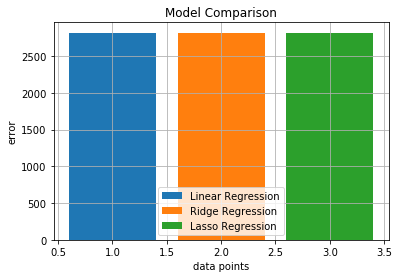

In [46]:
# Create linear regression object
regLinear = linear_model.LinearRegression()
regRidge = linear_model.Ridge(alpha = 0.05)
regLasso = linear_model.Lasso(alpha = 0.05)


# Train the model using the training sets
regLinear.fit(X_train, y_train)
regRidge.fit(X_train, y_train)
regLasso.fit(X_train, y_train)


# Make predictions using the testing set
y_hatLinear = regLinear.predict(X_test)
y_hatRidge = regRidge.predict(X_test)
y_hatLasso = regRidge.predict(X_test)

x = np.linspace(0,len(y_test)-1,len(y_test))

errorLinear = np.mean((y_hatLinear - y_test)**2)
errorRidge = np.mean((y_hatRidge - y_test)**2)
errorLasso = np.mean((y_hatLasso - y_test)**2)

plt.bar(1, errorLinear, label = "Linear Regression")
plt.bar(2, errorRidge,  label = "Ridge Regression")
plt.bar(3, errorLasso,  label = "Lasso Regression")

plt.legend()
plt.grid(True)
plt.xlabel("data points")
plt.ylabel("error")
plt.title("Model Comparison")

plt.show()

Lasso regression and ridge regression can penalize the coefficients.
The difference is:  
* Ridge: coefficients gradually fade to zero as alpha become larger.
* Lasso: coefficients can suddenly become zero as alpha become larger.

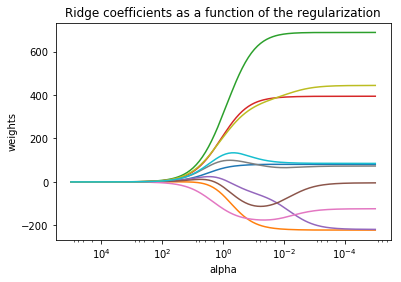

In [36]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

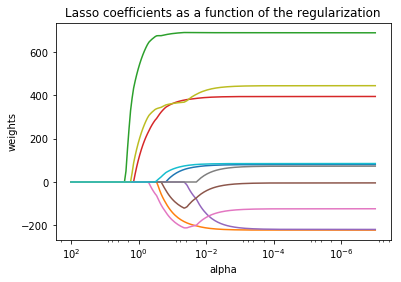

In [38]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-7, 2, n_alphas)

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Probabilistic regression

The formulation of probabilistic regression is different than simple linear regression.  
There are four parts of a probabilistic regression model:

* Choose a probabilistic model;  
    * It can be a generative model of a discriminative.  
    * generative model: $p_\theta(x,y)$ - assuming both x and y are random.    
    * discriminative model: $p_\theta(y|x)$ -assuming y is random and x is fixed.  
* Estimate parameters;  
    * Usually using **Maximum likelihood estimate**.   
    * $\hat{\theta} = \arg \max_\theta \sum_i \ln p_\theta (y_i, x_i).$   
* Minimize the expected loss.
    * $\hat{f}(x) = \arg \max_{\hat{y}} E_{p_\hat{\theta} (y|x)} err(y,\hat y)$

# ```mermaid
sequenceDiagram
A ->>B
```